<a href="https://colab.research.google.com/github/Bhavana0929/CNN_from_scratch/blob/main/CNN_from_scratch_experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/VikasSingh-DS/Kannada-MNIST/refs/heads/master/train.csv")

In [5]:
# Shuffling data set
data = data.sample(frac=1)
print(int(data.shape[0]/2))

30000


In [6]:
data.shape

(60000, 785)

In [3]:
data_first_half = data.head(30000)
data_second_half = data.tail(30000)

In [ ]:
data_first_half.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15816,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51662,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30424,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59097,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_first_half["label"].value_counts()

,count
label,
6,3059
0,3031
1,3012
8,3007
5,3006
2,2992
7,2992
9,2987
3,2986


In [9]:
# Get 100 data points
# Making sure that the data is balanced

tmp = []  # Initialize tmp as a list
for label in range(10):
  temp = data_first_half[data_first_half["label"]==label].head(600)
  tmp.append(temp) # Append each DataFrame to the list
data_balanced = pd.concat(tmp) # Concatenate all DataFrames in the list

tmp = []  # Initialize tmp as a list
for label in range(10):
  temp = data_second_half[data_second_half["label"]==label].head(100)
  tmp.append(temp) # Append each DataFrame to the list
data_test = pd.concat(tmp) # Concatenate all DataFrames in the list

print(data_test.shape)
print(data_balanced.shape)

(1000, 785)
(6000, 785)


In [10]:
# Convert flattened input train data to image data
data_balanced = data_balanced.sample(frac=1)
data_array = np.zeros((data_balanced.shape[0],1,28,28))
image_data = np.array(data_balanced.drop('label',axis=1))

for i in range(data_balanced.shape[0]):
    single_image = image_data[i,:].reshape(1,-1)
    single_image = single_image.reshape(-1,28)
    data_array[i,0,:,:] = single_image

data_array = data_array/255.

In [43]:
data_array.shape

(6000, 1, 28, 28)

In [24]:
### Convert flattened input test data to image data
data_test = data_test.sample(frac=1)
data_test_input = np.zeros((data_test.shape[0],1,28,28))
image_data = np.array(data_test.drop('label',axis=1))

for i in range(data_test.shape[0]):
    single_image = image_data[i,:].reshape(1,-1)
    single_image = single_image.reshape(-1,28)
    data_test_input[i,0,:,:] = single_image
data_test_input = data_test_input/255.

In [26]:
### Convert Labels to one hot encoding

label = data_balanced['label'].tolist()
one_hot_encoding = np.zeros((data_balanced.shape[0],10))
for i in range(data_balanced.shape[0]):
    position = label[i]
    one_hot_encoding[i,position] = 1

In [29]:
one_hot_encoding[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

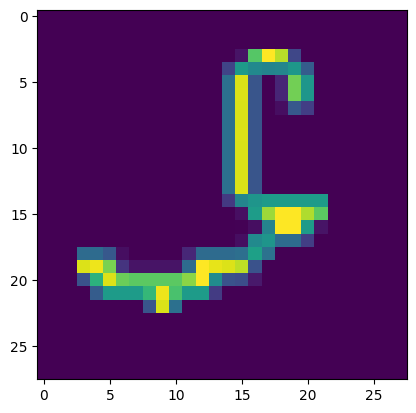

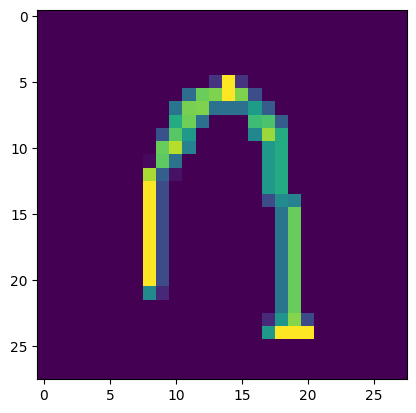

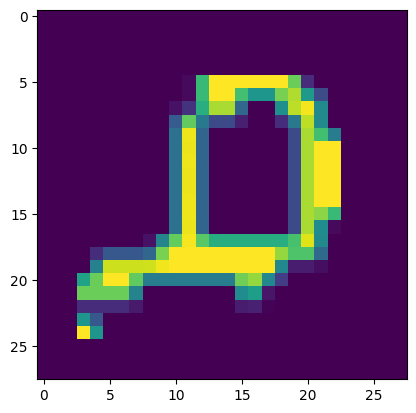

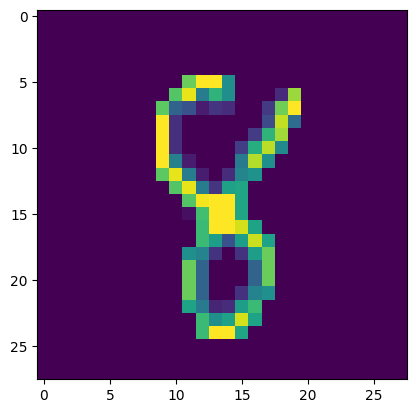

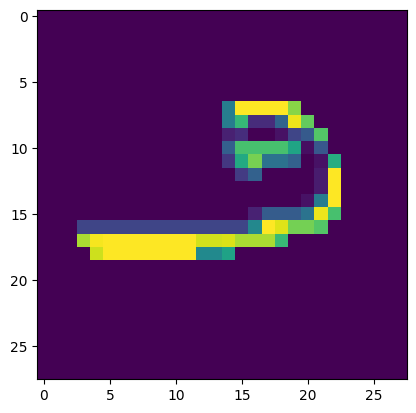

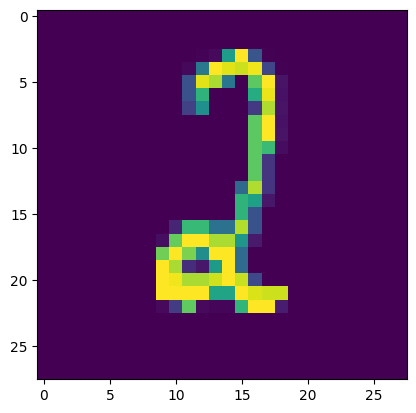

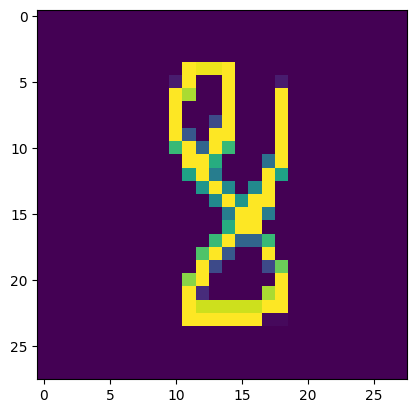

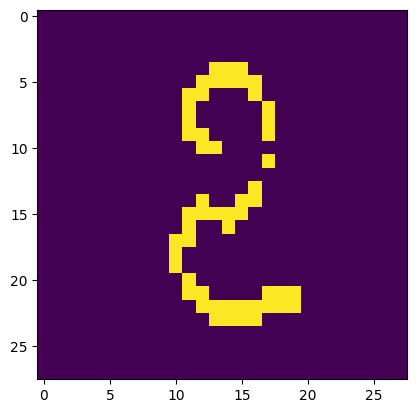

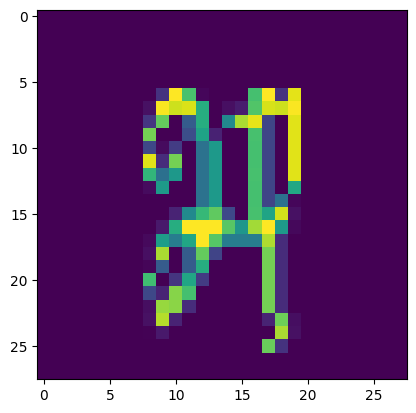

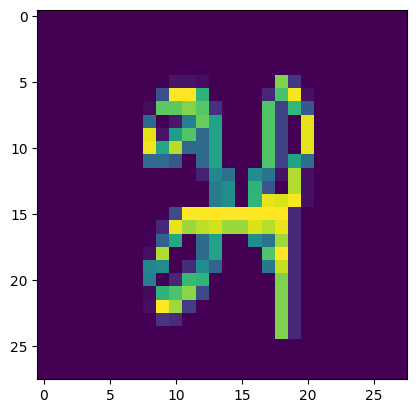

In [32]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(data_array[i,0,:,:])
    plt.pause(0.5)

In [33]:
import numpy as np
conv1 = np.random.randn(2,1,5,5) * np.sqrt(1. / 5)

In [35]:
conv1.shape

(2, 1, 5, 5)

In [40]:
def conv_forward(data_array,conv1,stride=1):
    stride = 1
    filter_h = conv1.shape[2]
    filter_w = conv1.shape[3]
    new_channels = conv1.shape[0]

    # Get resultant Width and Height of Image
    result_h = int(((data_array.shape[2]-filter_h)/stride)+1)
    result_w = int(((data_array.shape[3]-filter_w)/stride)+1)

    # Resultant Matrix of zeros
    result_conv1 = np.random.rand(data_array.shape[0],new_channels,result_h,result_w)

    for image_position in range(data_array.shape[0]):
      image_selected = data_array[image_position,:,:,:]
      for filter_position in range(conv1.shape[0]):
        filter_selected = conv1[filter_position,:,:,:]
        for i in range(0,image_selected.shape[1],stride):
          image_rectangle = image_selected[:,i:i+filter_h,:]
          if image_rectangle.shape[1]<filter_h:
            continue
          else:
            for j in range(0,image_rectangle.shape[2],stride):
                image_portion=image_rectangle[:,:,j:j+filter_w]
                if image_portion.shape[2]<filter_w:
                    continue
                else:
                    convolution_result = np.multiply(filter_selected,image_portion)
                    result_conv1[image_position,filter_position,i,j] = np.sum(convolution_result)
    return result_conv1


In [37]:
X = np.array([[1,0,0],[1,2,3],[3,4,5]])
X = X.reshape(1,1,3,3)

In [49]:
convex = np.array([[1,0],[0,1]])
convex = convex.reshape(1,1,2,2)
convex.shape

(1, 1, 2, 2)

In [51]:
c = convex.reshape(convex.shape[0],-1)
c.shape,c

((1, 4), array([[1, 0, 0, 1]]))

In [41]:
result = conv_forward(X,convex)

In [42]:
result

array([[[[3., 3.],
         [5., 7.]]]])

In [44]:
def im2col(X,conv1, stride, pad):
    # Padding
    X_padded = np.pad(X, ((0,0), (0,0), (pad, pad), (pad, pad)), mode='constant')
    X = X_padded
    new_height = int((X.shape[2]-(conv1.shape[2]))/stride)+1
    new_width =  int((X.shape[3]-(conv1.shape[3]))/stride)+1
    im2col_vector = np.zeros((X.shape[1]*conv1.shape[2]*conv1.shape[3],new_width*new_height*X.shape[0]))
    c = 0
    for position in range(X.shape[0]):

        image_position = X[position,:,:,:]
        for height in range(0,image_position.shape[1],stride):
            image_rectangle = image_position[:,height:height+conv1.shape[2],:]
            if image_rectangle.shape[1]<conv1.shape[2]:
                continue
            else:
                for width in range(0,image_rectangle.shape[2],stride):
                    image_square = image_rectangle[:,:,width:width+conv1.shape[3]]
                    if image_square.shape[2]<conv1.shape[3]:
                        continue
                    else:
                        im2col_vector[:,c:c+1]=image_square.reshape(-1,1)
                        c = c+1

    return(im2col_vector,new_height,new_width)
X_im2col,result_h,result_w = im2col(X=X,conv1=convex,pad=0,stride=1)
conv1_col = convex.reshape(convex.shape[0],-1)
X_result = conv1_col@X_im2col
X_result = np.array(np.hsplit(X_result, X.shape[0])).reshape((X.shape[0],convex.shape[0],result_h,result_w))
print(X_result)

[[[[3. 3.]
   [5. 7.]]]]


In [52]:
X_im2col,result_h,result_w = im2col(X=X,conv1=convex,pad=0,stride=1)
print(X_im2col),X_im2col.shape

[[1. 0. 1. 2.]
 [0. 0. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


(None, (4, 4))

In [ ]:
import numpy as np

def ReLU(x):
    return np.maximum(0, x)

In [64]:
def maxpool_multiple(input_image,stride=2):
  input_width = input_image.shape[3]
  input_height = input_image.shape[2]
  filter_width = 2
  filter_height = 2

  output_width = int((input_width-filter_width)/stride)+1
  output_height = int((input_height-filter_height)/stride)+1

  output_image = np.zeros((input_image.shape[0],input_image.shape[1],output_height,output_width))
  for i in range(output_image.shape[0]):
    output_image[i:i+1,:,:,:] = maxpool(input_image[i:i+1,:,:,:],stride=2)
  return output_image

def maxpool(input_image,stride=2):
  input_width = input_image.shape[3]
  input_height = input_image.shape[2]
  filter_width = 2
  filter_height = 2
  n_channels = input_image.shape[1]

  output_width = int((input_width-filter_width)/stride)+1
  output_height = int((input_height-filter_height)/stride)+1

  output = np.zeros((n_channels,output_height*output_width))
  c=0
  for height in range(0,input_height,stride):
    if height+filter_height <= input_height:
      image_rectangle = input_image[0,:,height:height+filter_height,:]
      for width in range(0,input_width,stride):
        if width+filter_width <= input_width:
          image_square = image_rectangle[:,:,width:width+filter_width]
          image_flatten = image_square.reshape(-1,1)
          output[:,c:c+1] = np.array([float(i.max().item()) for i in np.split(image_flatten,n_channels)]).reshape(-1,1)
          c+=1
  final_output = np.array(np.hsplit(output,1)).reshape((1,n_channels,output_height,output_width))
  return final_output

In [65]:
input_image = np.array([[
    [[1, 3, 2, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     [13, 14, 15, 16]],
    [[1, 3, 2, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12],
     [13, 14, 15, 16]]
]])
output = maxpool_multiple(input_image,stride=2)
print(output)

[[[[ 6.  8.]
   [14. 16.]]

  [[ 6.  8.]
   [14. 16.]]]]


In [53]:
def softmax(x):

    x_exp = np.exp(x-np.max(x))

    return x_exp/np.sum(x_exp,axis=0)

In [8]:
# Derivative of loss function with respect to Softmax activation function dW2,dB1
delta_2 = (final_fc-y_batch)
dw2 = delta_2@fc1.T
dB1 = np.sum(delta_2,axis=1,keedims=True)

In [9]:
# Derivative of loss function with respect to ReLU activation function dW1,dB0
delta_1 = np.multiply(W2.T@delta_2,dReLU(W1@X_maxpool_flatten+B0))
dW1 = delta_1@X_maxpool_flatten.T
dB0 = np.sum(delta_1,axis=1,keepdims=True)

In [4]:
def dReLU(x):
  return (x>0)*1.0

In [6]:
# Derivative of loss function with respect to Flattened layer input X0 (dX0)
delta_0 = np.multiply(W1.T@delta_1,1.0)

In [10]:
# Calculating gradients at Max pooling Layer
delta_maxpool = delta_0.reshape(X_maxpool.shape)

In [ ]:
# Calculating gradient at Convolutional Layer
delta_conv = np.zeros(X_conv.shape)
for image in range(len(max_indices)):
     indices = max_indices[image]
     for p in indices:
          delta_conv[image:image+1,p[1],p[2],p[3]] = delta_maxpool[image:image+1,p[5],p[6],p[7]]
delta_conv = np.multiply(delta_conv,dReLU(X_conv))

In [ ]:
# reshape the gradient matrix
def error_layer_reshape(error_layer):
    test_array = error_layer
    test_array_new = np.zeros((test_array.shape[1],test_array.shape[0]*test_array.shape[2]*test_array.shape[3]))
    for i in range(test_array_new.shape[0]):
        test_array_new[i:i+1,:] = test_array[:,i:i+1,:,:].ravel()
    return test_array_new

In [ ]:
# Calculating gradient of convolutional filter
X_batch_im2col = im2col(X=X_batch,conv1=conv1, stride=1, pad=0)
delta_conv = np.random.rand(10,2,24,24)
delta_conv_reshape = error_layer_reshape(delta_conv)
conv1_delta = (delta_conv_reshape@X_batch_im2col.T).reshape(2,1,5,5)